In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loss_fn(X, y, beta):
  return cp.norm2(cp.matmul(X, beta) - y)**2

def regularization(beta):
  return cp.norm1(beta)

def objective_fn(X, y, beta, lamda):
  return loss_fn(X, y, beta) + lamda * regularization(beta)

def mse(X, y, beta):
  return (1.0/X.shape[0]) *loss_fn(X, y, beta).value

In [ ]:
def generate_data(sample = 100, feature = 20, sigma = 5, density = 0.2):
  "Generate data X and observation Y"
  np.random.seed(1)
  beta_star = np.random.randn(feature)
  idxs = np.random.choice(range(feature), int((1-density)*feature), replace=False)
  for idx in idxs:
    beta_star[idx] = 0

  X = np.random.randn(sample, feature)
  Y = X.dot(beta_star) + np.random.normal(0, sigma, size=sample)
  return X, Y, beta_star


In [ ]:
m= 100
n=20
sigma=5
density=0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[:50, :]
y_train = Y[:50]

X_test = X[50:, :]
y_test = Y[50:]

print("Sample: ", X_train.shape[0])
print("Feature: ", X_train.shape[1])

Sample:  50
Feature:  20


In [ ]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg = True)
print(beta.shape)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, y_train, beta, lambd)))


(20,)


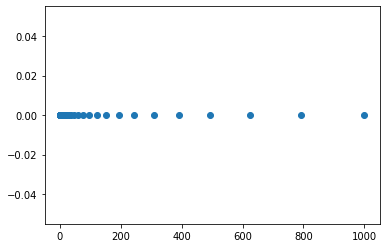

In [ ]:
lambd_value = np.logspace(-2, 3, 50)

y = np.zeros(len(lambd_value))
plt.plot(lambd_value, y, 'o')


In [ ]:
train_errors =[]
test_errors = []
beta_values = []
for v in lambd_value:
  lambd.value = v
  problem.solve()
  train_errors.append(mse(X_train, y_train, beta))
  test_errors.append(mse(X_test, y_test, beta))
  beta_values.append(beta.value)

In [ ]:
%matplotlib inline

def plot_train_test_errors(train_errors, test_errors, lambd_value ):
  plt.plot(lambd_value, train_errors, label="Train errors")
  plt.plot(lambd_value, test_errors, label = "Test errors")
  plt.xscale('log')
  plt.legend()
  plt.xlabel(r'$\lambda$', fontsize = 16)
  plt.title('Mean Square Error (MSE)')
  plt.show()

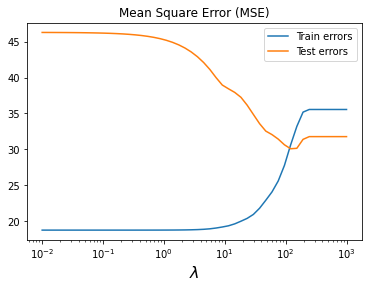

In [ ]:
plot_train_test_errors(train_errors, test_errors, lambd_value)

-----------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

[(-10.0, 70.0),
 Text(0, 0.5, 'speed(km/h)'),
 (-2.0, 32.0),
 Text(0.5, 0, 'time(s)')]

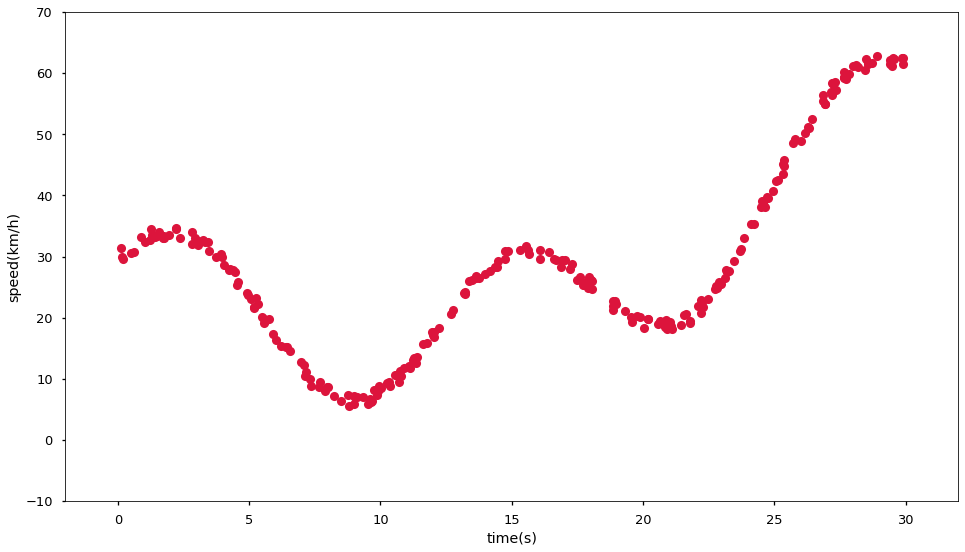

In [ ]:
t = 30*np.random.rand(256)
sqd = 13*np.sin(t/2)+3.7*np.cos(t/2 + 7) + 3*t+0.1*(t-10)**2 - 3*(t-3) + 7+2.3*np.random.rand(*t.shape)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(t, sqd, 'o', color='crimson')
ax.set(xlabel='time(s)', ylabel='speed(km/h)', xlim=(-2, 32), ylim=(-10,70))

In [ ]:
model = make_pipeline(PolynomialFeatures(degree=100), Lasso(10.0, tol=0.01, max_iter=300000))
model.fit(t[:, np.newaxis], sqd[:, np.newaxis])
xfit = np.linspace(0, 30, 3000)
yfit = model.predict(xfit[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.359e+03, tolerance: 6.104e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[(-10.0, 70.0),
 Text(0, 0.5, 'speed (km/h)'),
 (-2.0, 32.0),
 Text(0.5, 0, 'time (s)')]

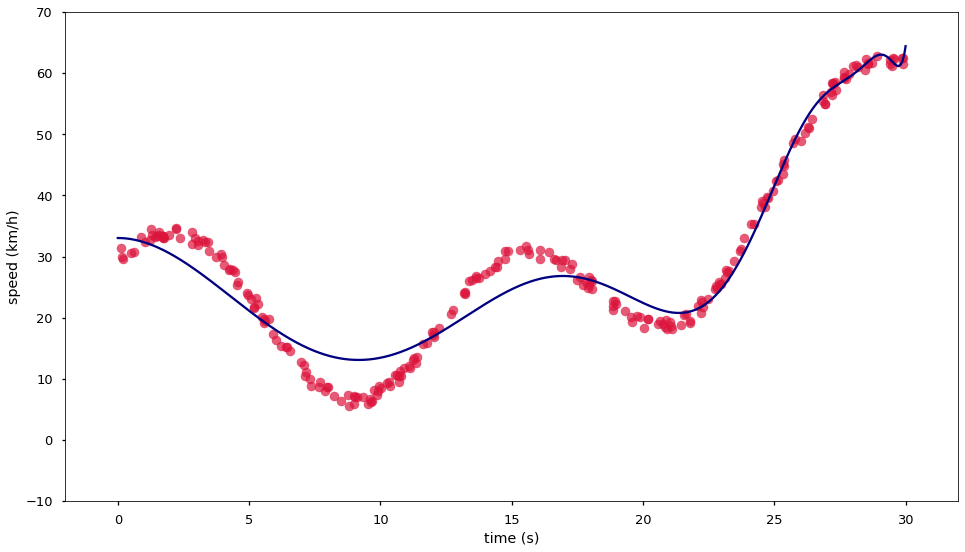

In [ ]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.scatter(t, sqd, color='crimson', alpha=0.7)
ax.plot(xfit, yfit, color='navy')
ax.set(xlabel='time (s)', ylabel='speed (km/h)', xlim=(-2, 32), ylim = (-10, 70))

In [ ]:
import warnings
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=LinAlgWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

model2 = make_pipeline(
    PolynomialFeatures(degree=5),
    Ridge(alpha=1, tol = 0.1, max_iter=3000)
)
grid = GridSearchCV(model2,{
                    'polynomialfeatures__degree':list(range(5,21)),
                    'ridge__alpha' : [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 50, 100, 200, 300, 500]
                    }, cv= 5)
grid.fit(t[:, np.newaxis], sqd[:, np.newaxis])
grid.best_estimator_, grid.best_score_

(Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=11)),
                 ('ridge', Ridge(alpha=0.2, max_iter=3000, tol=0.1))]),
 0.9979832175579363)

[(-10.0, 70.0),
 Text(0, 0.5, 'Speed (km/h)'),
 (-2.0, 32.0),
 Text(0.5, 0, 'Time (s)')]

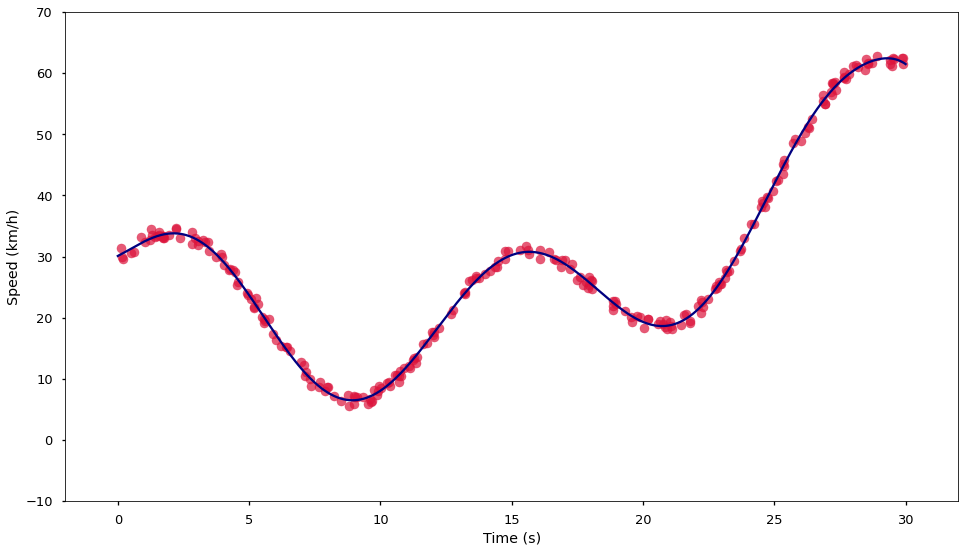

In [ ]:
xfit = np.linspace(0, 30,3000)
yfit = grid.best_estimator_.predict(xfit[:, np.newaxis])
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(t, sqd, color="crimson", alpha=0.7)
ax.plot(xfit, yfit, color='navy')
ax.set(xlabel='Time (s)', ylabel='Speed (km/h)', xlim=(-2, 32), ylim=(-10,70))

-----------------GIA NHA----------------


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# loading dataset
boston_data = datasets.load_boston()
print(boston_data.DESCR) #DESCR is full description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

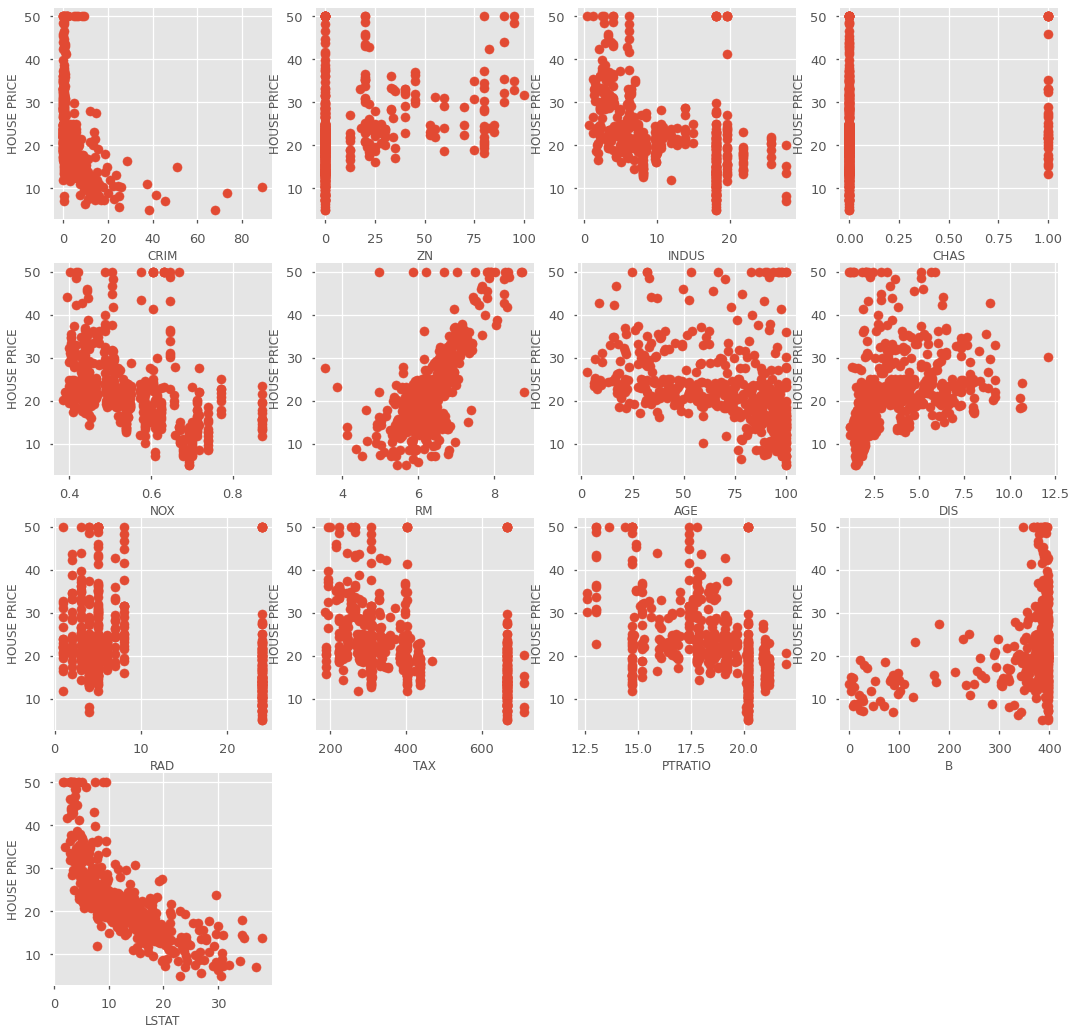

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))
for index, feature_name in enumerate(boston_data.feature_names):
  ax = fig.add_subplot(4, 4,index+1)
  ax.scatter(boston_data.data[:, index], boston_data.target)
  ax.set_ylabel("HOUSE PRICE", size = 12)
  ax.set_xlabel(feature_name, size = 12)

plt.show()

In [ ]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df.target = np.asarray(boston_data.target)
boston_df['House price'] = pd.Series(boston_df.target)
X = boston_df.iloc[:,:-1]
Y = boston_df.iloc[:, -1]
boston_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print("Shape of train data of X = %s and Y = %s"%(x_train.shape, y_train.shape))
print("Shape of test data of X = %s and Y = %s"%(x_test.shape, y_test.shape))

Shape of train data of X = (404, 13) and Y = (404,)
Shape of test data of X = (102, 13) and Y = (102,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [ ]:
# Calculating the Mean-Squared error(MSE)
mse = np.mean((y_pred - y_test)**2)
mse

28.543532452638928

In [ ]:
# putting together the coefficient and their cprresponding variable names
lreg_coef = pd.DataFrame()
lreg_coef['Columns'] = x_train.columns
lreg_coef['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.119014
1        ZN              0.055120
2     INDUS             -0.003850
3      CHAS              2.279294
4       NOX            -16.001818
5        RM              3.862104
6       AGE              0.001629
7       DIS             -1.456784
8       RAD              0.289914
9       TAX             -0.012646
10  PTRATIO             -0.968580
11        B              0.007976
12    LSTAT             -0.493244


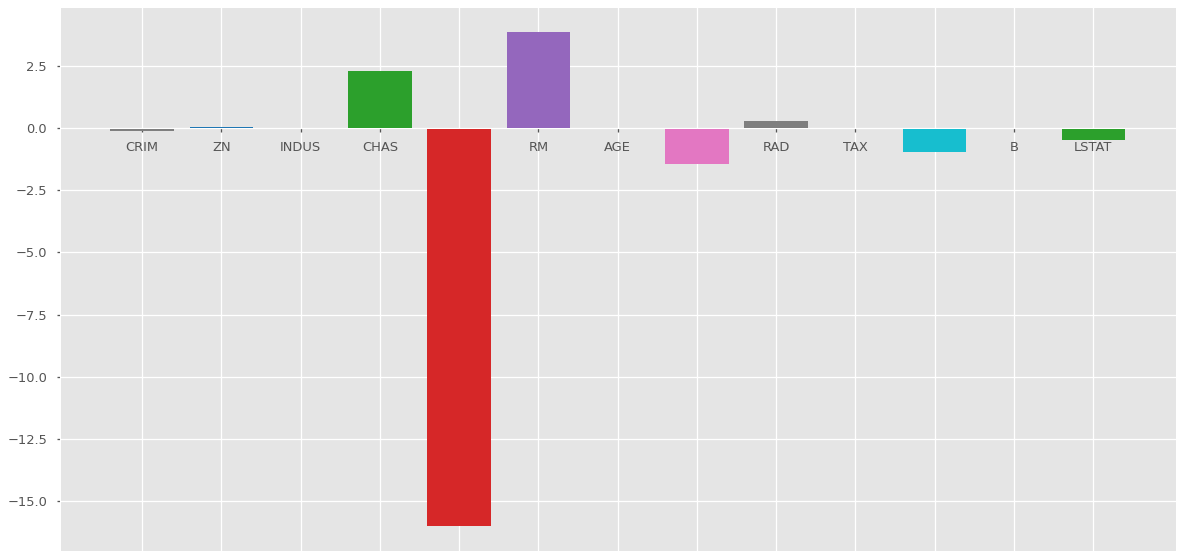

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color = ["tab:gray","tab:blue", "tab:orange","tab:green","tab:red","tab:purple","tab:brown",
         "tab:pink", "tab:gray", "tab:olive","tab:cyan","tab:orange","tab:green","tab:blue","tab:olive"]

ax.bar(lreg_coef["Columns"], lreg_coef["Coefficient Estimate"], color = color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()
